In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion= keras.datasets.fashion_mnist
(trainImages,trainLabels),(testImages,testLabels)=fashion.load_data()

In [4]:
"""Fashion-MNIST is a benchmark image dataset used in machine learning and deep learning, especially for image classification tasks.
It was created as a drop-in replacement for the classic MNIST digit dataset, but with real-world complexity.
Instead of handwritten digits ➝ it contains fashion products

Basic Details
Total images: 70,000
Training images: 60,000
Test images: 10,000
Image size: 28 × 28 pixels
Color: Grayscale (1 channel)
Task: Multi-class classification (10 classes)

Classes (Labels)
Each image belongs to one of 10 fashion categories:
Label	Class Name
0	T-shirt / top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot

datasets.fashion_mnist is a built-in dataset loader that:
Automatically downloads the dataset
Splits it into training and testing sets
Returns images and labels as NumPy arrays"""

'Fashion-MNIST is a benchmark image dataset used in machine learning and deep learning, especially for image classification tasks.\nIt was created as a drop-in replacement for the classic MNIST digit dataset, but with real-world complexity.\nInstead of handwritten digits ➝ it contains fashion products\n\nBasic Details\nTotal images: 70,000\nTraining images: 60,000\nTest images: 10,000\nImage size: 28 × 28 pixels\nColor: Grayscale (1 channel)\nTask: Multi-class classification (10 classes)\n\nClasses (Labels)\nEach image belongs to one of 10 fashion categories:\nLabel\tClass Name\n0\tT-shirt / top\n1\tTrouser\n2\tPullover\n3\tDress\n4\tCoat\n5\tSandal\n6\tShirt\n7\tSneaker\n8\tBag\n9\tAnkle boot\n\ndatasets.fashion_mnist is a built-in dataset loader that:\nAutomatically downloads the dataset\nSplits it into training and testing sets\nReturns images and labels as NumPy arrays'

Image Label: 9


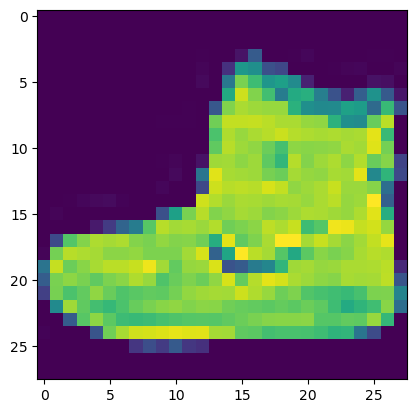

In [3]:
imgIndex = 0
img = trainImages[imgIndex]
print("Image Label:",trainLabels[imgIndex])
plt.imshow(img)

In [4]:
print(trainImages.shape)
print(testImages.shape)

(60000, 28, 28)
(10000, 28, 28)


In [10]:
"""How ANN works with Fashion-MNIST
Fashion-MNIST images are 28 × 28 pixels.
ANN cannot take 2D images directly, so we must flatten them.
ANN architecture is most suitable for structured tabular datasets where features are independent and there is no spatial or temporal relationship among them."""

'How ANN works with Fashion-MNIST\nFashion-MNIST images are 28 × 28 pixels.\nANN cannot take 2D images directly, so we must flatten them.\nANN architecture is most suitable for structured tabular datasets where features are independent and there is no spatial or temporal relationship among them.'

In [5]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(128,activation=tf.nn.relu),
                          keras.layers.Dense(10,activation=tf.nn.softmax)])

c:\Users\asus\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.compile(optimizer= "adam",loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [7]:
model.fit(trainImages,trainLabels,epochs=5,batch_size=32)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6981 - loss: 3.3417
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7628 - loss: 0.6856
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7835 - loss: 0.6041
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8000 - loss: 0.5517
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8137 - loss: 0.5203


In [8]:
model.evaluate(testImages,testLabels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7961 - loss: 0.5825


[0.5824989676475525, 0.7961000204086304]

In [9]:
predictions= model.predict(testImages[0:5])
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
[[6.61070615e-26 2.05657664e-17 3.75344382e-25 1.85671912e-28
  6.54047674e-17 6.38188869e-02 6.37348485e-17 4.76907752e-02
  5.32827914e-11 8.88490260e-01]
 [2.89222196e-04 3.83923208e-07 9.80026364e-01 5.05274684e-08
  1.69991404e-02 1.41686975e-11 2.68480601e-03 1.16114655e-20
  3.69257763e-10 4.60442204e-20]
 [1.11406226e-08 1.00000000e+00 7.47946965e-14 6.20778939e-09
  2.32279862e-09 8.71726831e-23 1.12758920e-17 0.00000000e+00
  3.83998081e-21 0.00000000e+00]
 [8.78733317e-08 9.99998212e-01 4.16841431e-12 1.11427369e-06
  5.85537009e-07 4.21074151e-24 1.34639004e-14 0.00000000e+00
  1.35192058e-17 0.00000000e+00]
 [7.71194100e-02 1.35199027e-02 2.86245942e-01 6.76123351e-02
  1.16237625e-01 1.79736852e-03 3.86185884e-01 1.37199311e-06
  5.12798168e-02 3.51652687e-07]]


In [10]:
print(np.argmax(predictions,axis=1))
print(testLabels[0:5])

[9 2 1 1 6]
[9 2 1 1 6]


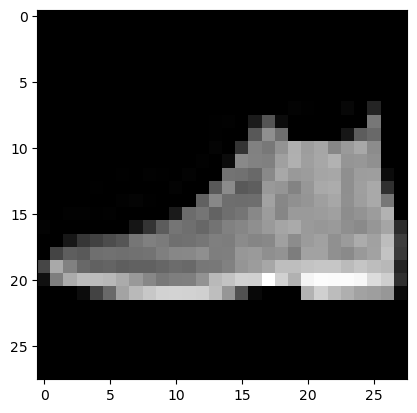

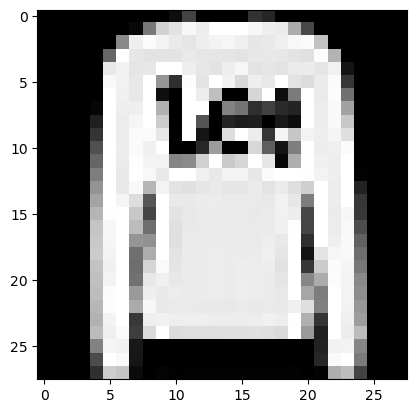

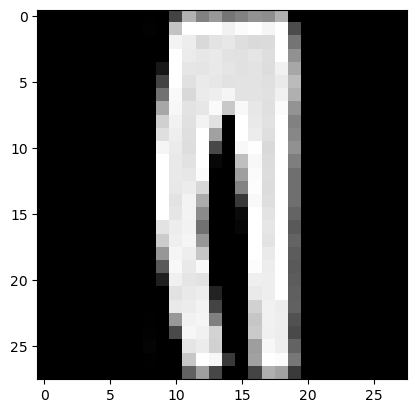

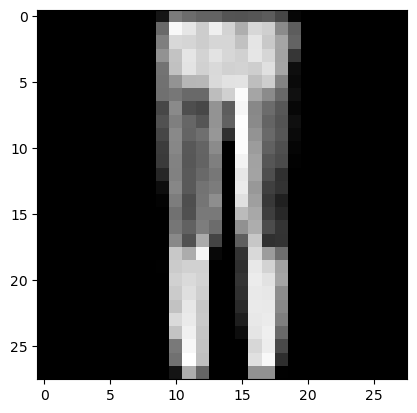

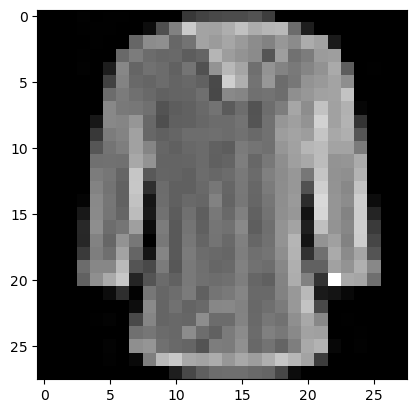

In [11]:
for i in range(0,5):
    plt.imshow(testImages[i],cmap="gray")
    plt.show()